In [ ]:
!pip install wandb

In [46]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras import layers
import wandb
from wandb.keras import WandbCallback

In [ ]:
wandb.init(project='cfar100')

In [48]:


config=wandb.config
config.learning_rate=0.001



In [49]:
dataset=tf.keras.datasets.cifar100
(X_train,Y_train),(X_test,Y_test)=dataset.load_data()
(X_train_deep,Y_train_deep),(X_test_deep,Y_test_deep)=dataset.load_data()

[19]


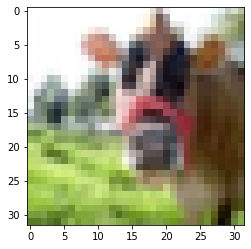

In [50]:
plt.imshow(X_train[0])
print(Y_train[0])

In [51]:
print(X_train.shape)
print(Y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [52]:

X_train=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2]*X_train.shape[3])

In [53]:
X_train.shape

(50000, 3072)

In [54]:
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

In [55]:
#mlp
model=tf.keras.models.Sequential([
    Dense(64,input_dim=X_train.shape[1],activation='relu'),#input_layer
    Dense(32,activation='relu'),
    Dense(100,activation='softmax')#output_layer

])

In [56]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=config.learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [57]:
output=model.fit(X_train,Y_train,validation_data=(X_val,Y_val),epochs=10,callbacks=[WandbCallback()])

Epoch 1/10
1250/1250 [==============================] - 6s 4ms/step - loss: 5.7194 - accuracy: 0.0091 - val_loss: 4.6062 - val_accuracy: 0.0089 - _timestamp: 1646563465.0000 - _runtime: 16.0000
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 4.6061 - accuracy: 0.0091 - val_loss: 4.6065 - val_accuracy: 0.0086 - _timestamp: 1646563469.0000 - _runtime: 20.0000
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 4.6061 - accuracy: 0.0097 - val_loss: 4.6224 - val_accuracy: 0.0086 - _timestamp: 1646563475.0000 - _runtime: 26.0000
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 4.7210 - accuracy: 0.0092 - val_loss: 4.6068 - val_accuracy: 0.0086 - _timestamp: 1646563479.0000 - _runtime: 30.0000
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 4.6058 - accuracy: 0.0095 - val_loss: 4.6070 - val_accuracy: 0.0086 - _timestamp: 1646563484.0000 - _runtime: 35.0000
Epoch 6/10
1250/1250 [========

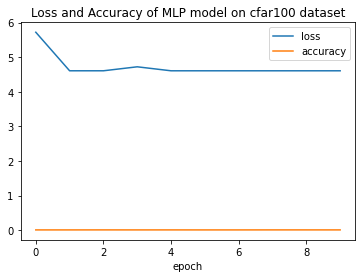

In [58]:
plt.plot(output.history['loss'])
plt.plot(output.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.title('Loss and Accuracy of MLP model on cfar100 dataset')
plt.show()

In [59]:
print(X_test.shape)
print(Y_test.shape)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2]*X_test.shape[3])
print(X_test.shape)

(10000, 32, 32, 3)
(10000, 1)
(10000, 3072)


In [60]:

accuracy = model.evaluate(X_test,Y_test)


313/313 [==============================] - 2s 6ms/step - loss: 4.6054 - accuracy: 0.0100


In [61]:
X_train_deep,X_val_deep,Y_train_deep,Y_val_deep=train_test_split(X_train_deep,Y_train_deep,test_size=0.2,random_state=42)

In [62]:
X_train_deep,X_val_deep,X_test_deep = X_train_deep / 255.0,X_val_deep/255.0,X_test_deep / 255.0

In [63]:
model_deep=tf.keras.models.Sequential([
                                       layers.Conv2D(16,(3,3),activation='relu',input_shape=(32,32,3)),
                                       layers.Conv2D(16,(3,3),activation='relu'),
                                       layers.MaxPooling2D((2,2)),
                                       layers.Conv2D(32,(3,3),activation='relu'),
                                       layers.Conv2D(32,(3,3),activation='relu'),
                                       layers.MaxPooling2D((2,2)),
                                       layers.Conv2D(64,(3,3),activation='relu'),
                                       layers.Conv2D(64,(3,3),activation='relu'),
                                       layers.Flatten(),
                                       layers.Dense(64,activation='relu'),
                                       layers.Dense(100,activation='softmax')

])

In [64]:
model_deep.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 32)        4640      
                                                                 
 conv2d_15 (Conv2D)          (None, 10, 10, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                  

In [65]:
model_deep.compile(tf.keras.optimizers.Adam(learning_rate=config.learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [66]:

output_deep=model_deep.fit(X_train_deep,Y_train_deep,validation_data=(X_val_deep,Y_val_deep),epochs=10,callbacks=[WandbCallback()])

Epoch 1/10
1250/1250 [==============================] - 13s 9ms/step - loss: 4.1653 - accuracy: 0.0557 - val_loss: 3.8690 - val_accuracy: 0.0969 - _timestamp: 1646563533.0000 - _runtime: 84.0000
Epoch 2/10
1250/1250 [==============================] - 13s 10ms/step - loss: 3.6768 - accuracy: 0.1310 - val_loss: 3.4961 - val_accuracy: 0.1592 - _timestamp: 1646563545.0000 - _runtime: 96.0000
Epoch 3/10
1250/1250 [==============================] - 11s 9ms/step - loss: 3.3922 - accuracy: 0.1809 - val_loss: 3.3377 - val_accuracy: 0.1910 - _timestamp: 1646563557.0000 - _runtime: 108.0000
Epoch 4/10
1250/1250 [==============================] - 11s 9ms/step - loss: 3.2000 - accuracy: 0.2147 - val_loss: 3.1736 - val_accuracy: 0.2246 - _timestamp: 1646563568.0000 - _runtime: 119.0000
Epoch 5/10
1250/1250 [==============================] - 11s 9ms/step - loss: 3.0592 - accuracy: 0.2423 - val_loss: 3.1357 - val_accuracy: 0.2312 - _timestamp: 1646563579.0000 - _runtime: 130.0000
Epoch 6/10
1250/1250 

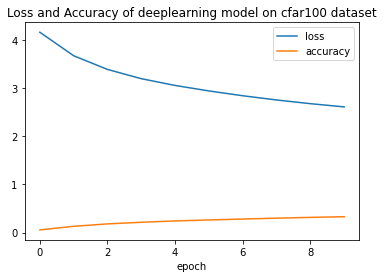

In [67]:
plt.plot(output_deep.history['loss'])
plt.plot(output_deep.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.title('Loss and Accuracy of deeplearning model on cfar100 dataset')
plt.show()

In [68]:
model_deep.evaluate(X_test_deep,Y_test_deep)

313/313 [==============================] - 2s 5ms/step - loss: 2.8897 - accuracy: 0.2905


[2.8897085189819336, 0.2904999852180481]